In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

import json

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8296fd168477c9dc72c2cc0c229be3fb


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bluff
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | torit
Processing Record 4 of Set 13 | pingzhuang
Processing Record 5 of Set 13 | takoradi
Processing Record 6 of Set 13 | tiksi
Processing Record 7 of Set 13 | arraial do cabo
Processing Record 8 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 13 | abu dhabi
Processing Record 11 of Set 13 | swan river
Processing Record 12 of Set 13 | ambilobe
Processing Record 13 of Set 13 | novobeysugskaya
Processing Record 14 of Set 13 | palmerston
Processing Record 15 of Set 13 | souillac
Processing Record 16 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 13 | muzhi
Processing Record 18 of Set 13 | port alfred
Processing Record 19 of Set 13 | avarua
Processing Record 20 of Set 13 | amderma
City not

Processing Record 35 of Set 16 | mago
Processing Record 36 of Set 16 | cockburn town
Processing Record 37 of Set 16 | palmer
Processing Record 38 of Set 16 | litovko
Processing Record 39 of Set 16 | jacqueville
Processing Record 40 of Set 16 | port hedland
Processing Record 41 of Set 16 | ogdensburg
Processing Record 42 of Set 16 | alofi
Processing Record 43 of Set 16 | inhambane
Processing Record 44 of Set 16 | nanortalik
Processing Record 45 of Set 16 | costinesti
Processing Record 46 of Set 16 | old saybrook
Processing Record 47 of Set 16 | rokycany
Processing Record 48 of Set 16 | joutseno
Processing Record 49 of Set 16 | paamiut
Processing Record 50 of Set 16 | comodoro rivadavia
Processing Record 1 of Set 17 | negombo
Processing Record 2 of Set 17 | roald
Processing Record 3 of Set 17 | doha
Processing Record 4 of Set 17 | haapiti
Processing Record 5 of Set 17 | farafenni
Processing Record 6 of Set 17 | coquimbo
Processing Record 7 of Set 17 | sao jose da coroa grande
Processing 

Processing Record 24 of Set 20 | ostrovnoy
Processing Record 25 of Set 20 | marsaxlokk
Processing Record 26 of Set 20 | aswan
Processing Record 27 of Set 20 | margate
Processing Record 28 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 29 of Set 20 | hami
Processing Record 30 of Set 20 | wajima
Processing Record 31 of Set 20 | varena
Processing Record 32 of Set 20 | chapais
Processing Record 33 of Set 20 | walvis bay
Processing Record 34 of Set 20 | bilhaur
Processing Record 35 of Set 20 | caravelas
Processing Record 36 of Set 20 | poum
Processing Record 37 of Set 20 | sao filipe
Processing Record 38 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 20 | araouane
Processing Record 40 of Set 20 | kalmunai
Processing Record 41 of Set 20 | omboue
Processing Record 42 of Set 20 | itoman
Processing Record 43 of Set 20 | arvika
Processing Record 44 of Set 20 | grindavik
Processing Record 45 of Set 20 | rungata
City not found. Skipping...
P

Processing Record 8 of Set 24 | mweka
Processing Record 9 of Set 24 | daru
Processing Record 10 of Set 24 | dawei
Processing Record 11 of Set 24 | myaundzha
Processing Record 12 of Set 24 | sigmaringen
Processing Record 13 of Set 24 | singaraja
Processing Record 14 of Set 24 | verkhoyansk
Processing Record 15 of Set 24 | inirida
Processing Record 16 of Set 24 | caconda
Processing Record 17 of Set 24 | matata
Processing Record 18 of Set 24 | hobyo
Processing Record 19 of Set 24 | huarmey
Processing Record 20 of Set 24 | ruatoria
City not found. Skipping...
Processing Record 21 of Set 24 | mayo
Processing Record 22 of Set 24 | umea
Processing Record 23 of Set 24 | frontera
Processing Record 24 of Set 24 | kodinar
Processing Record 25 of Set 24 | karamay
City not found. Skipping...
Processing Record 26 of Set 24 | carolina
Processing Record 27 of Set 24 | progreso
Processing Record 28 of Set 24 | praya
Processing Record 29 of Set 24 | xuddur
Processing Record 30 of Set 24 | sampit
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-08-01 02:46:05,-46.60,168.33,53.74,80,100,4.68
1,Ushuaia,AR,2020-08-01 02:45:09,-54.80,-68.30,41.00,65,75,13.87
2,Torit,SS,2020-08-01 02:46:06,4.41,32.57,67.46,93,97,1.52
3,Pingzhuang,CN,2020-08-01 02:46:06,42.04,119.29,91.42,35,0,7.63
4,Takoradi,GH,2020-08-01 02:46:06,4.88,-1.76,74.35,85,44,9.46
5,Tiksi,RU,2020-08-01 02:46:06,71.69,128.87,44.10,73,68,6.31
6,Arraial Do Cabo,BR,2020-08-01 02:46:06,-22.97,-42.03,68.09,77,54,13.78
7,Abu Dhabi,AE,2020-08-01 02:46:06,24.47,54.37,96.80,47,75,8.05
8,Swan River,CA,2020-08-01 02:46:06,52.11,-101.27,63.25,70,40,2.19
9,Ambilobe,MG,2020-08-01 02:46:07,-13.20,49.05,64.87,90,4,3.62


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
#today = time.strftime("%x")
#today

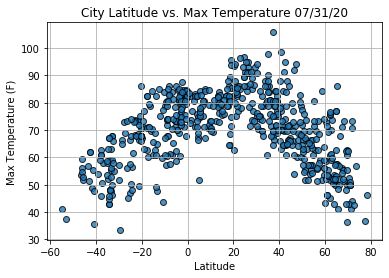

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

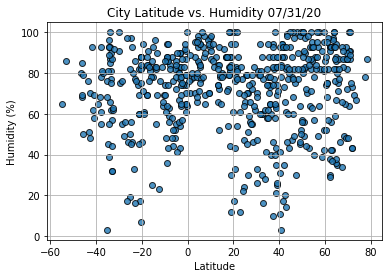

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

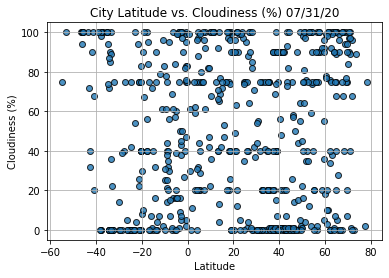

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

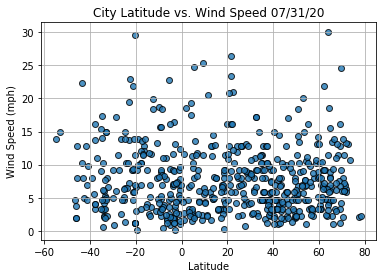

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()